In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from common import *
from plotting import *
from PatientVec.Experiments.hyperparam_exps import *

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [3]:
def get_yr_df(data_name, evaluate) :
    yr_df = []
    for model in ['baselines', 'Basic', 'Attention', 'Structured Attention', 'Hierarchical Attention'] :
        name = os.path.join('outputs/', data_name, model)
        if os.path.exists(name) :
            dirs = os.listdir(name)
            for d in sorted(dirs) :
                if 'pretrained' in d.lower() or 'replicate' in d.lower() or 'balanced' in d.lower(): continue
                dirname = os.path.join(name, d)
                if evaluate :
                    model_name = get_latest_model(dirname)
                else :
                    model_name = get_latest_model_with_test(dirname)
                if model_name is not None :
                    if evaluate :
                        df = json.load(open(os.path.join(model_name, 'evaluate.json')))
                    else :
                        df = json.load(open(os.path.join(model_name, 'test_evaluate.json')))
                    vals = {k:v for k, v in df.items()}
                    vals['model'] = d
                    vals['type'] = model
                    vals['encoder'] = d.split('+')[0].split('(')[0]
                    vals['structured'] = 'Structured' in d
                    yr_df.append(vals)
    yr_df = pd.DataFrame(yr_df)
    return yr_df

['#0173b2',
 '#de8f05',
 '#029e73',
 '#d55e00',
 '#cc78bc',
 '#ca9161',
 '#fbafe4',
 '#949494',
 '#ece133',
 '#56b4e9']

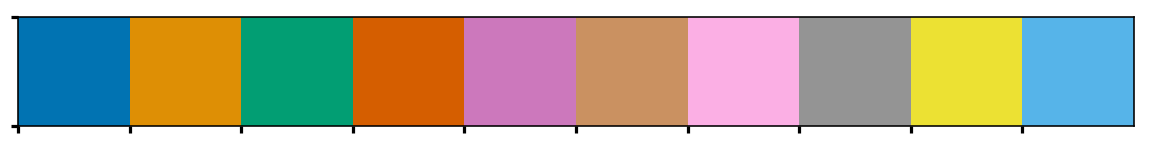

In [4]:
sns.palplot(sns.color_palette())
sns.color_palette().as_hex()

In [5]:
def plot_encoders(name, key, evaluate=False) :
    df_readmission = get_yr_df(name, evaluate)
    df_lr = df_readmission[df_readmission.encoder == 'LR']
    df_readmission = df_readmission[df_readmission.encoder != 'LR']
    
    fig = sns.barplot(x='encoder', y=key, hue='type', 
                      data=df_readmission[df_readmission.structured == False], 
                      hue_order=['Basic', 'Attention', 'Structured Attention', 'Hierarchical Attention'])
    fig.axes.set_ylim(min(df_readmission[key])-0.02, max(df_readmission[key])+0.02)
    xmin, xmax = fig.axes.get_xlim()
    y = df_lr[df_lr.model == 'LR+BOW+norm=None'][key]
    fig.axes.hlines(y, xmin, xmax, colors='#222222')
    y = df_lr[df_lr.model == 'LR+BOW+norm=l2'][key]
    fig.axes.hlines(y, xmin, xmax, color='#d01c8b')
    fig.axes.get_legend().remove()
    fig.axes.set_ylabel(fig.axes.get_ylabel().replace('_', ' ').upper())
    sns.despine()
    fig.figure.savefig('Text-encoding-EHR/results/' + name + '/encoder_graph_unstructured.pdf', bbox_inches='tight')
    
    plt.show()
    
    fig = sns.barplot(x='encoder', y=key, hue='type', data=df_readmission[df_readmission.structured == True])
    fig.axes.set_ylim(min(df_readmission[key])-0.02, max(df_readmission[key])+0.02)
    xmin, xmax = fig.axes.get_xlim()
    y = df_lr[df_lr.model == 'LR+BOW+norm=None+Structured'][key]
    fig.axes.hlines(y, xmin, xmax, colors='#222222')
    y = df_lr[df_lr.model == 'LR+BOW+norm=l2+Structured'][key]
    fig.axes.hlines(y, xmin, xmax, color='#d01c8b')
    fig.axes.get_legend().remove()
    fig.axes.set_ylabel(fig.axes.get_ylabel().replace('_', ' ').upper())
    sns.despine()
    fig.figure.savefig('Text-encoding-EHR/results/' + name + '/encoder_graph_structured.pdf', bbox_inches='tight')
    plt.show()

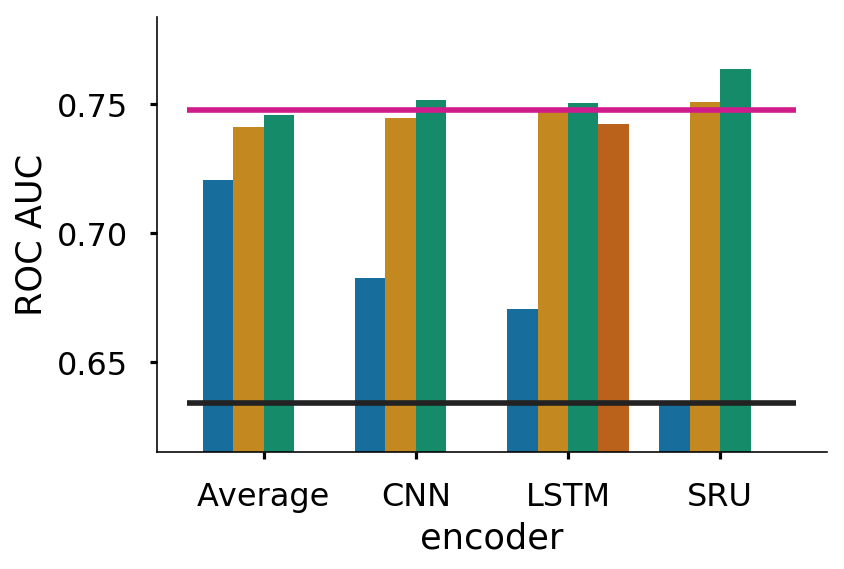

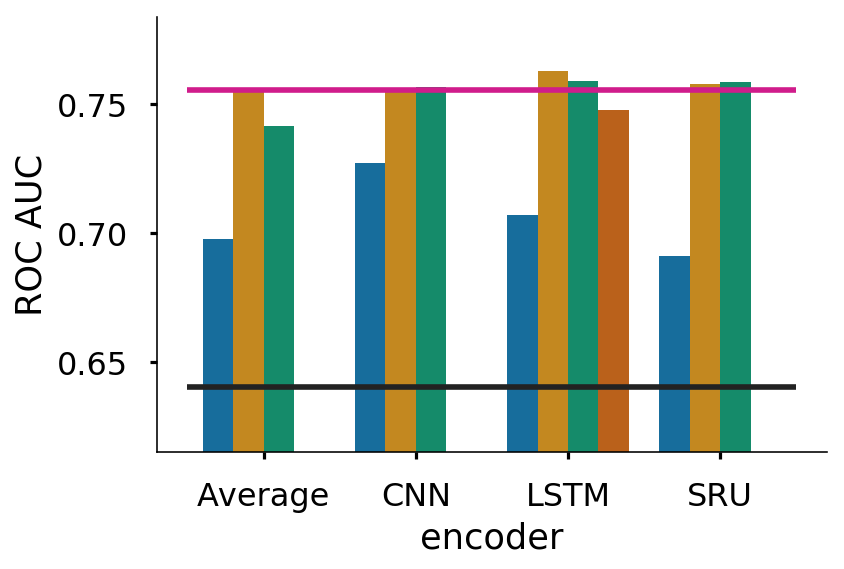

In [16]:
plot_encoders('Readmission', 'roc_auc')

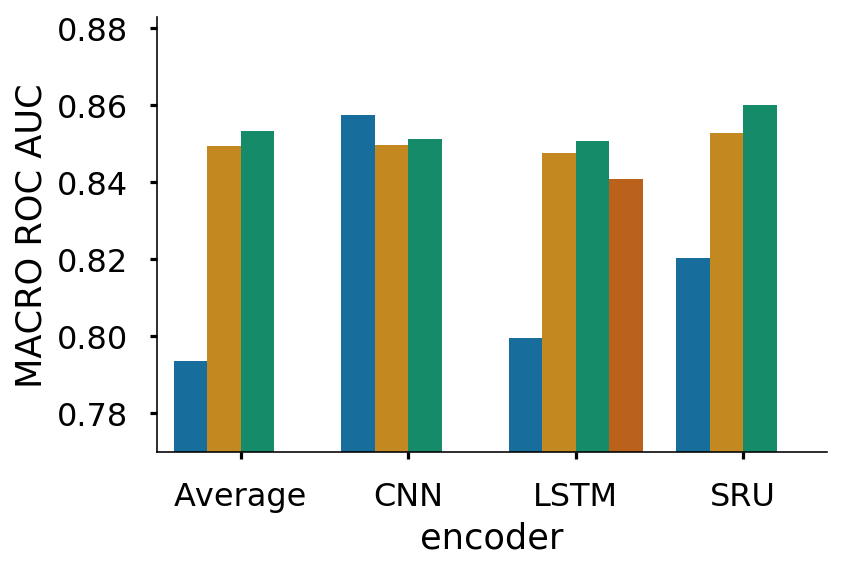

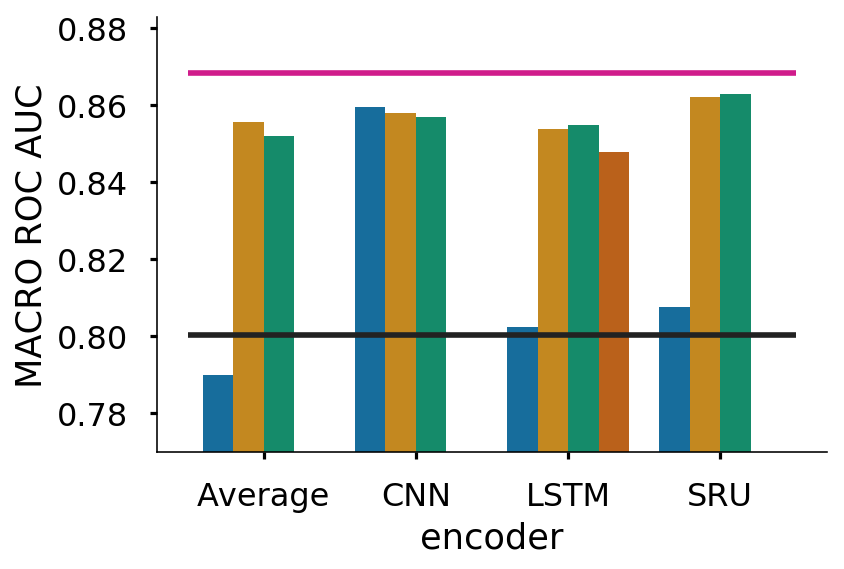

In [17]:
plot_encoders('Diagnosis', 'macro_roc_auc')

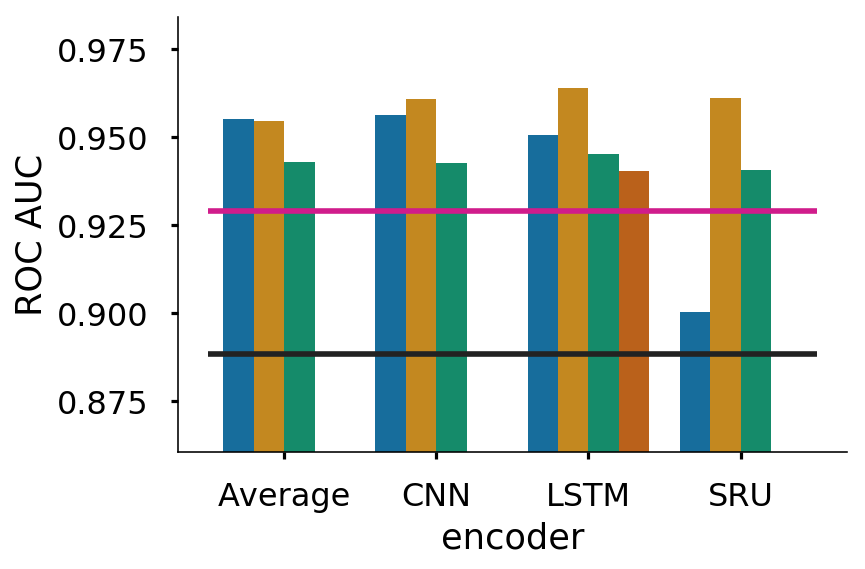

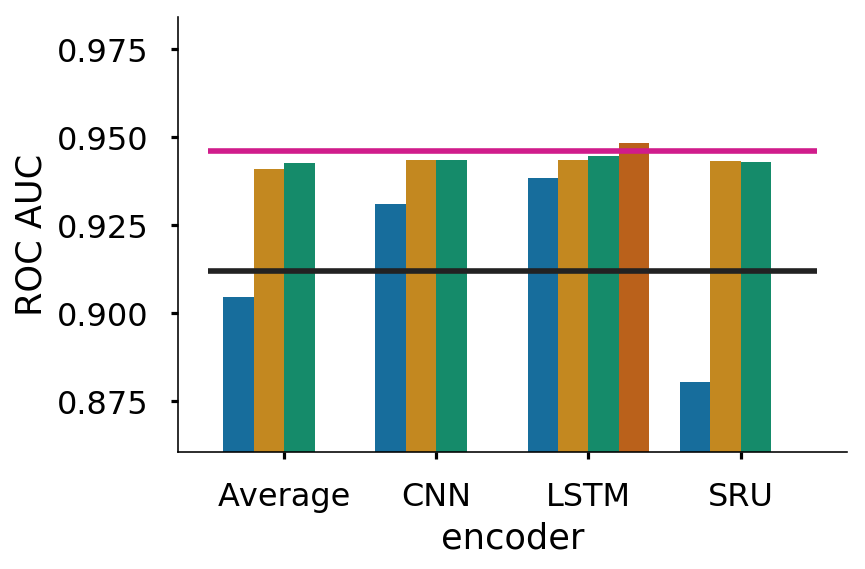

In [18]:
plot_encoders('Mortality_30day', 'roc_auc')

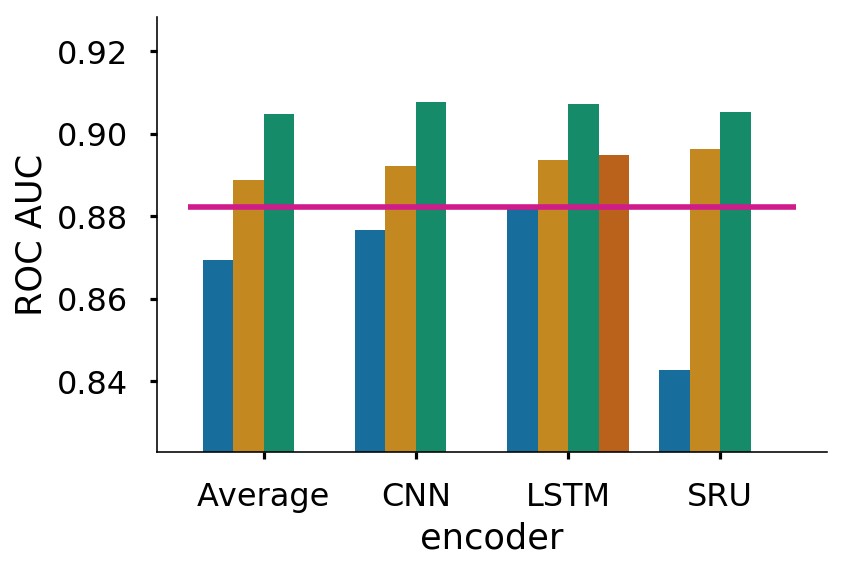

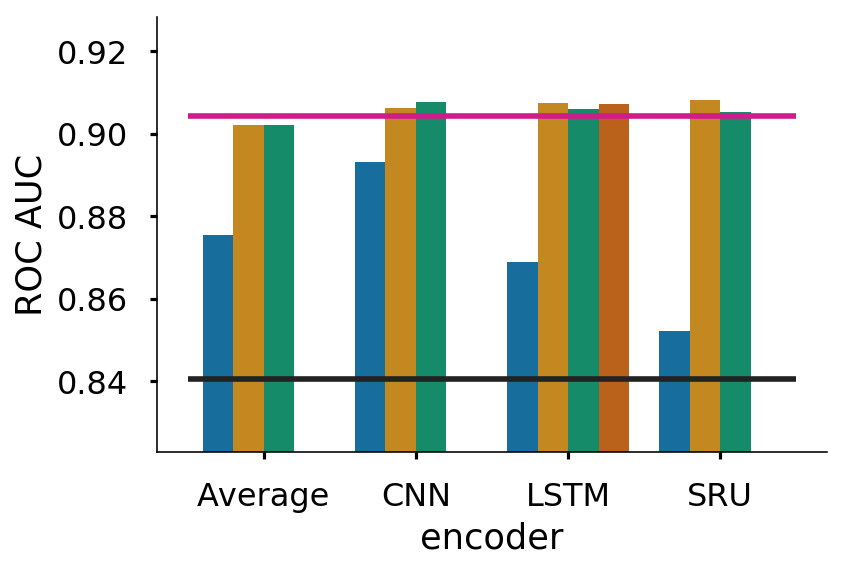

In [19]:
plot_encoders('Mortality_1yr', 'roc_auc')

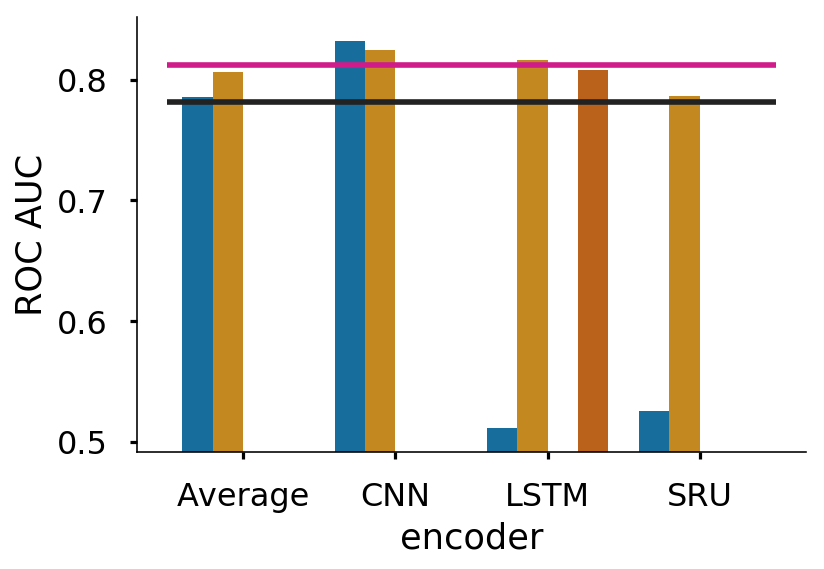

ValueError: min() arg is an empty sequence

In [20]:
plot_encoders('HipSurgery_1', 'roc_auc')

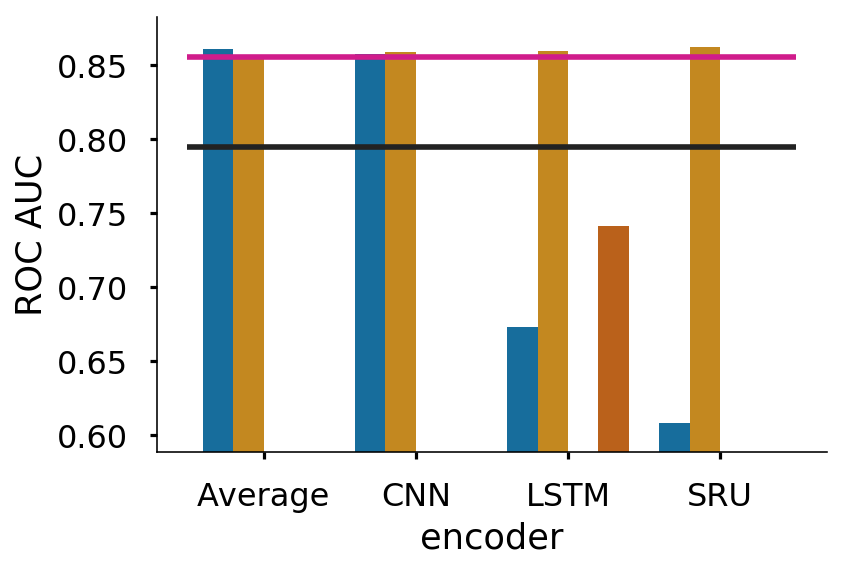

ValueError: min() arg is an empty sequence

In [21]:
plot_encoders('KneeSurgery_1', 'roc_auc')

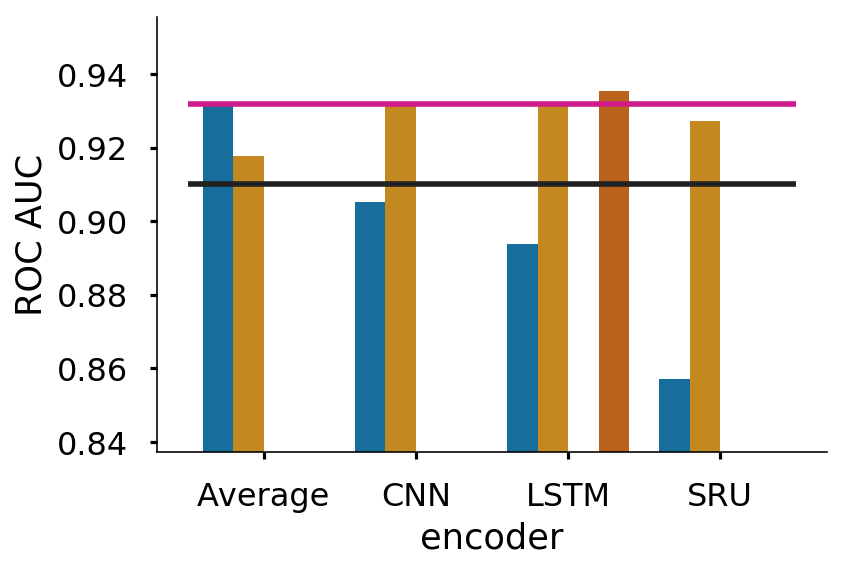

ValueError: min() arg is an empty sequence

In [22]:
plot_encoders('Pneumonia', 'roc_auc', evaluate=True)

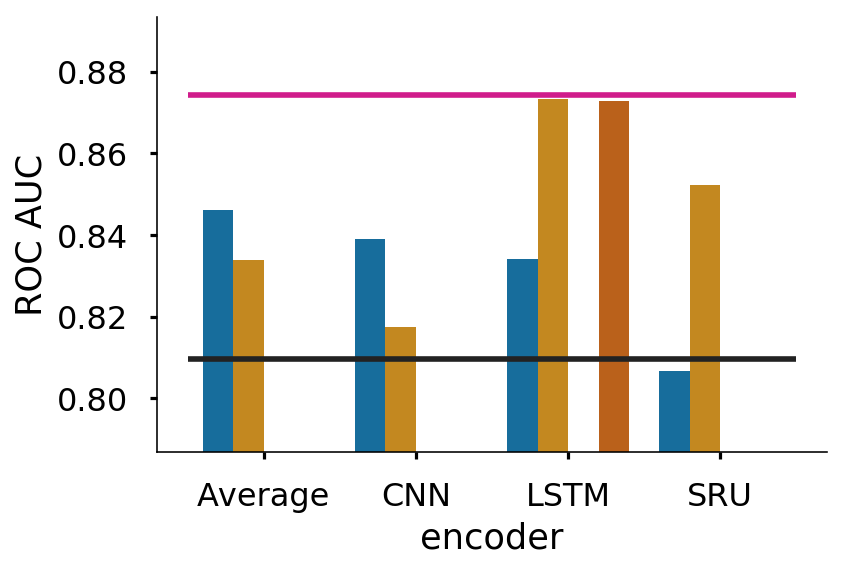

ValueError: min() arg is an empty sequence

In [23]:
plot_encoders('Immunosuppressed', 'roc_auc', evaluate=True)